In [1]:
import matplotlib.pyplot as plt # for plotting and creating figures
import numpy as np # for easy and fast number calculation
from math import tau

import Package4
from Package4 import ImageReader
from Package4 import Fourier

[0.00000000e+00 1.29844706e-03 2.59689411e-03 ... 6.28058841e+00
 6.28188686e+00 6.28318531e+00] [-291.84686797 -292.34686797 -292.84686797 ... -289.84686797 -290.84686797
 -291.84686797] [540.79956871 540.76385443 540.75255499 ... 541.01023124 540.90901572
 540.79956871]


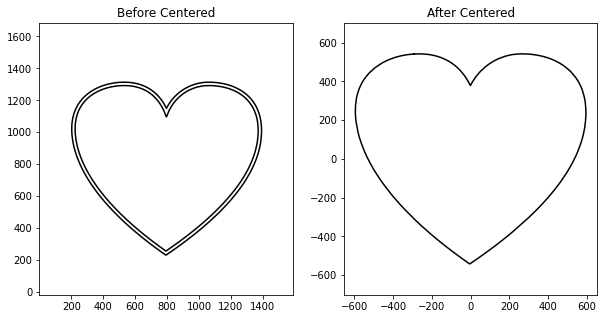

In [3]:
image = ImageReader("Heart.png")
time_table, x_table, y_table = image.get_tour()

print(time_table, x_table, y_table)

In [4]:
order = 50

cf = Fourier(time_table, x_table, y_table,order)
fouriercoeff = cf.coef_list(time_table, x_table, y_table,order)

print(fouriercoeff)

[[ 1.87884119e+00  2.25051575e-01]
 [ 3.75747275e-01  1.10952101e+00]
 [-1.23869864e+00  5.86299142e+00]
 [-2.66064233e+00  8.59103596e-01]
 [-5.99710726e+00 -8.52680665e-02]
 [-5.61597752e-01 -6.09528462e+00]
 [-7.15987538e+00 -2.71021928e+01]
 [ 1.28151041e+01 -2.29366424e+01]
 [-4.21062257e+00 -3.68135954e+01]
 [-3.66895785e+02 -8.61808801e+01]
 [-8.27581748e+01  0.00000000e+00]
 [-3.66895785e+02  8.61808801e+01]
 [-4.21062257e+00  3.68135954e+01]
 [ 1.28151041e+01  2.29366424e+01]
 [-7.15987538e+00  2.71021928e+01]
 [-5.61597752e-01  6.09528462e+00]
 [-5.99710726e+00  8.52680665e-02]
 [-2.66064233e+00 -8.59103596e-01]
 [-1.23869864e+00 -5.86299142e+00]
 [ 3.75747275e-01 -1.10952101e+00]
 [ 1.87884119e+00 -2.25051575e-01]]
